In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data3/hh5/tmp/akm157/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][0:50:,:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/github/trackeddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

In [4]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])

(<matplotlib.figure.Figure at 0x7fd986342f60>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd93ffdad30>,
       dtype=object))

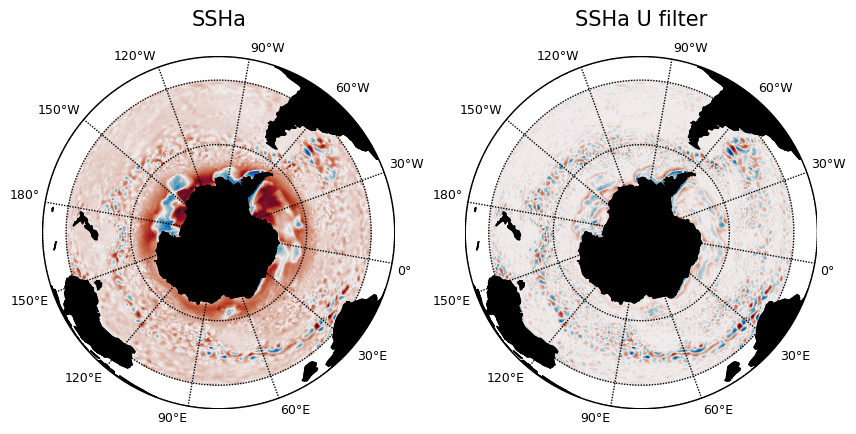

In [5]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])

nofilterdata=eta[0,:,:]-ssh_mean
nofilterdata=nofilterdata.filled(fill_value=0)
nofilterdata = nofilterdata - ndimage.uniform_filter(nofilterdata, size=70)
data = ma.masked_array(nofilterdata, mask)
basemap_mplot(lon,lat,[eta[0,:,:]-ssh_mean,data],title=["SSHa","SSHa U filter"],scale='Lin',cmap=cm.cm.balance\
              ,vmin='',vmax='',xan=2,yan=1,figsize=(10,5),fontsize=15,dpi=100)

In [6]:
eddytd=analyseddyzt(eta,lon,lat,0,1,1,40,1,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,eccenfit=0.8,gaussrsquarefit=0.5,ellipsrsquarefit=0.8\
                    ,destdir='',physics='',\
                    diagnostics=False,pprint=False)
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-40,-1,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,eccenfit=0.8,gaussrsquarefit=0.5,ellipsrsquarefit=0.8\
                     ,destdir='',physics='',\
                     diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 69 s  Number of contours analysed: 347 
 0% [>]100% Time Elapsed: 63 s  Number of contours analysed: 725 


In [7]:
eddytduf=analyseddyzt(eta,lon,lat,0,0,1,45,1,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                      ,eccenfit=0.95,gaussrsquarefit=0.5,ellipsrsquarefit=0.9\
                      ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')
eddytdufn=analyseddyzt(eta,lon,lat,0,0,1,-45,-1,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,eccenfit=0.95,gaussrsquarefit=0.5,ellipsrsquarefit=0.9\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')

UnboundLocalError: local variable 'eddytd' referenced before assignment

In [ ]:
#eddytdgf=analyseddyzt(eta,lon,lat,0,1,1,40,1,10,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='gaussian')
#eddytdgfn=analyseddyzt(eta,lon,lat,0,1,1,-40,-1,-10,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='gaussian')

In [ ]:
shape_Eta=shape(eta)
del eta

In [ ]:
sfield=reconstruct_syntetic(shape_Eta,lon,lat,eddytd)+reconstruct_syntetic(shape_Eta,lon,lat,eddytdn)
del eddytdn, eddytd
sfielduf=reconstruct_syntetic(shape_Eta,lon,lat,eddytduf)+reconstruct_syntetic(shape_Eta,lon,lat,eddytdufn)
del eddytduf, eddytdufn
#sfieldgf=reconstruct_syntetic(shape_Eta,lon,lat,eddytdgf)+reconstruct_syntetic(shape_Eta,lon,lat,eddytdgfn)
#del eddytdgf, eddytdgfn

In [ ]:
# datatest=data*1
# print(shape(datatest))
# pcolormesh(lon,lat,data,vmin=0,vmax=20)
# plot(eddytduf['eddyn_227']['contour'][0][0],eddytduf['eddyn_227']['contour'][0][1],'*r')
# xlim([eddytduf['eddyn_227']['contour'][0][0].min()-0.5,eddytduf['eddyn_227']['contour'][0][0].max()+0.5])
# ylim([eddytduf['eddyn_227']['contour'][0][1].min()-0.5,eddytduf['eddyn_227']['contour'][0][1].max()+0.5])
# show()

# cerolon=nanmean(eddytduf['eddyn_227']['contour'][0][0])
# cerolat=nanmean(eddytduf['eddyn_227']['contour'][0][0])
# minlon=find(lon,eddytduf['eddyn_227']['contour'][0][0].min())
# maxlon=find(lon,eddytduf['eddyn_227']['contour'][0][0].max())
# print(minlon,maxlon)
# datatest[:,:minlon-1]=np.nan
# datatest[:,maxlon+1:]=np.nan
# for ii in range(0,len(eddytduf['eddyn_227']['contour'][0][0])):
    

# pcolormesh(lon,lat,datatest,vmin=0,vmax=20)
# plot(eddytduf['eddyn_227']['contour'][0][0],eddytduf['eddyn_227']['contour'][0][1],'*r')
# xlim([eddytduf['eddyn_227']['contour'][0][0].min()-0.5,eddytduf['eddyn_227']['contour'][0][0].max()+0.5])
# ylim([eddytduf['eddyn_227']['contour'][0][1].min()-0.5,eddytduf['eddyn_227']['contour'][0][1].max()+0.5])  
        

In [ ]:
basemap_mplot(lon,lat,[data[:,:],sfield[0,:,:],sfielduf[0,:,:]],title=["Original","No filter",'uniform'],scale='Lin',cmap=cm.cm.balance\
              ,vmin=-100,vmax=100,xan=3,yan=1,figsize=(15,5),fontsize=15)

In [ ]:
basemap_mplot(lon,lat,data[:,:]-sfielduf[0,:,:],title="Difference",scale='Lin',cmap=cm.cm.balance\
              ,vmin=-100,vmax=100,xan=1,yan=1,figsize=(15,5),fontsize=15)

In [ ]:
from scipy import signal

In [ ]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                    [-10+0j, 0+ 0j, +10 +0j],
                    [ -3+3j, 0+10j,  +3 +3j]])

grad=signal.convolve2d(nofilterdata, scharr, boundary='symm', mode='same')

In [ ]:
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(15, 6))
ax_orig.imshow(nofilterdata)
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad),cmap='gray',vmin=0,vmax=100)
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()